In [1]:
### Import libraries
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' # Matplotlib 한글서체 오류처리
plt.rc('axes', unicode_minus=False)

# !pip install yfinance
# import yfinance as yf  # Yahoo Finance API

# !pip install pykrx
# from pykrx import stock  # 네이버금융

# !pip install pandas-datareader # 주식 데이터 조회
import pandas_datareader as web

# !pip install mplfinance # 금융차트
import mplfinance as mpf
# 한국식 캔들차트 생성을 위한 스타일 지정 (상승-빨강, 하락-파랑)
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors= colorset)

In [2]:
capital = pd.read_excel('position.xlsx', sheet_name='capital')
eva = pd.read_excel('position.xlsx', sheet_name='eva')
position = pd.read_excel('position.xlsx', sheet_name='position')

ticker = pd.read_excel('position.xlsx', sheet_name='ticker')

tkstring = []

for tk in ticker.TICKER:
    tkstring.append('0' * (6 - len(str(tk))) + str(tk))    
    
ticker.TICKER = tkstring
# ticker.tail()

---------------------------------------------
최근 360 일 데이터 조회 - MA 20d, 50d
---------------------------------------------

** ARIRANG 미국단기우량회사채 **
Ticker  : 332610
Market  : US
Type    : Bond
MEAN +/-: 3 %
MAX/MIN : 111 / 98
RANGE.  : 13
PV      : 110


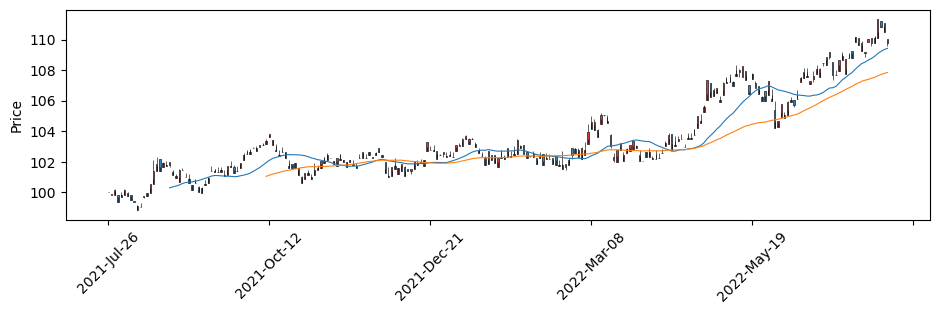

** TIGER 골드선물(H) **
Ticker  : 319640
Market  : Global
Type    : Commodity
MEAN +/-: 1 %
MAX/MIN : 110 / 93
RANGE.  : 17
PV      : 93


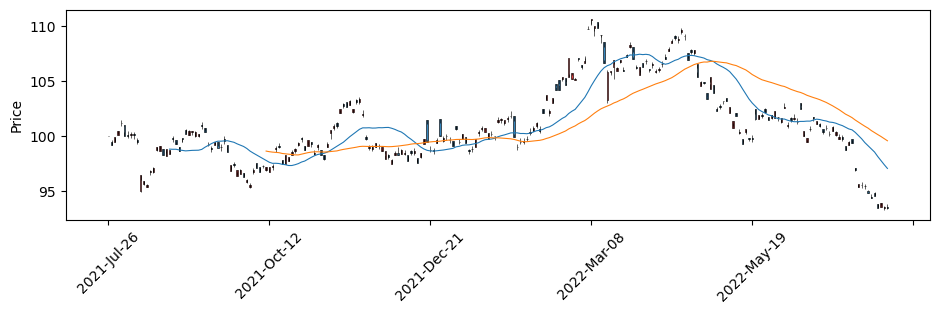

** 신한 인버스 옥수수 선물 ETN(H) **
Ticker  : 500014
Market  : Global
Type    : Commodity
MEAN +/-: -15 %
MAX/MIN : 107 / 64
RANGE.  : 43
PV      : 82


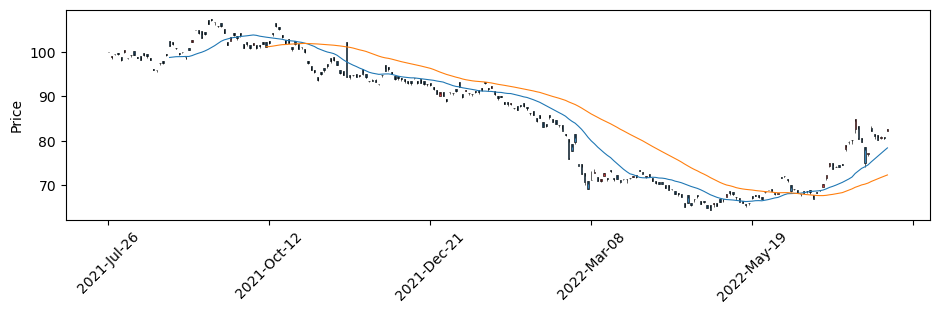

** 대신 인버스 아연선물 ETN(H) **
Ticker  : 510004
Market  : Global
Type    : Commodity
MEAN +/-: -18 %
MAX/MIN : 100 / 56
RANGE.  : 44
PV      : 89


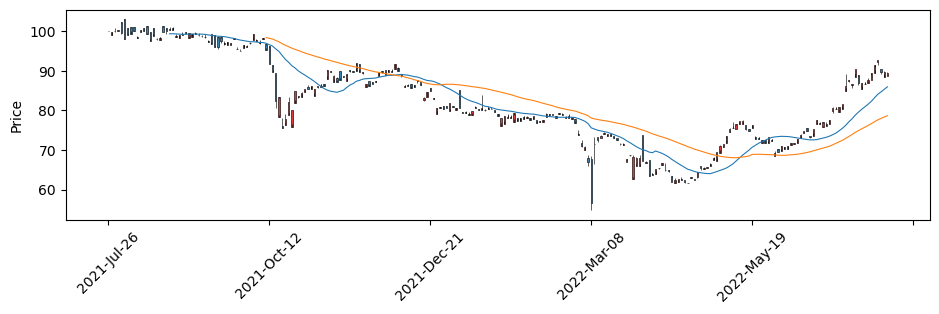

** 대신 인버스 니켈선물 ETN(H) **
Ticker  : 510006
Market  : Global
Type    : Commodity
MEAN +/-: -30 %
MAX/MIN : 107 / 26
RANGE.  : 81
PV      : 42


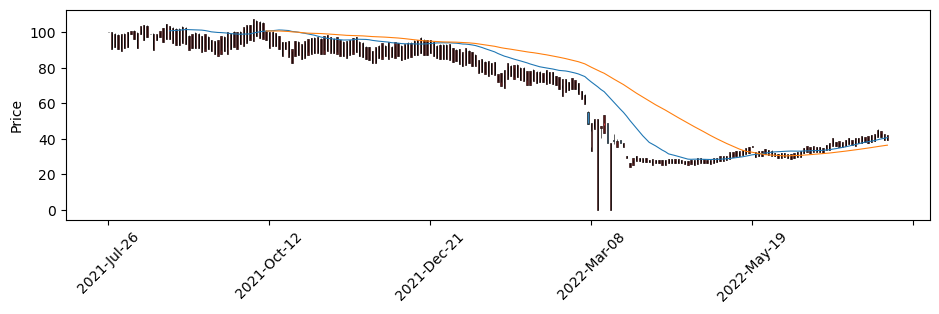

** 대신 인버스 알루미늄 선물 ETN(H) **
Ticker  : 510018
Market  : Global
Type    : Commodity
MEAN +/-: -13 %
MAX/MIN : 108 / 64
RANGE.  : 44
PV      : 104


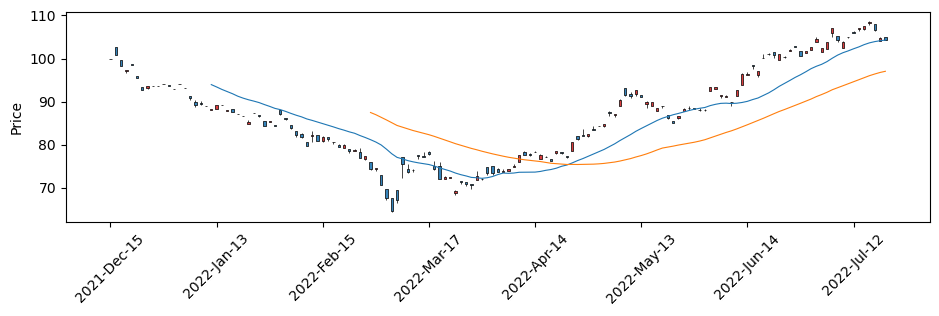

** ARIRANG 신흥국MSCI(합성 H) **
Ticker  : 195980
Market  : Global
Type    : Index
MEAN +/-: -10 %
MAX/MIN : 102 / 73
RANGE.  : 29
PV      : 75


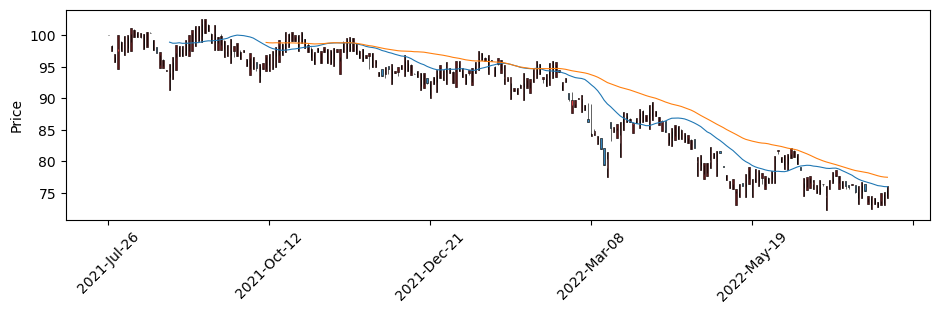

** KOSEF 인도Nifty50(합성) **
Ticker  : 200250
Market  : Global
Type    : Index
MEAN +/-: 10 %
MAX/MIN : 120 / 99
RANGE.  : 21
PV      : 108


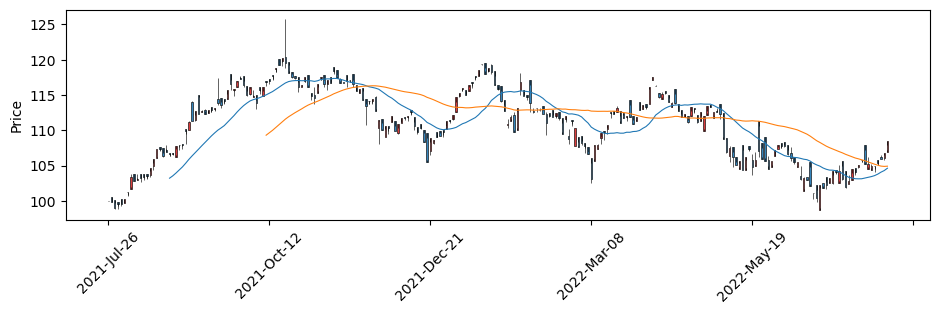

** KINDEX 인도네시아MSCI(합성) **
Ticker  : 256440
Market  : Global
Type    : Index
MEAN +/-: 20 %
MAX/MIN : 143 / 98
RANGE.  : 45
PV      : 124


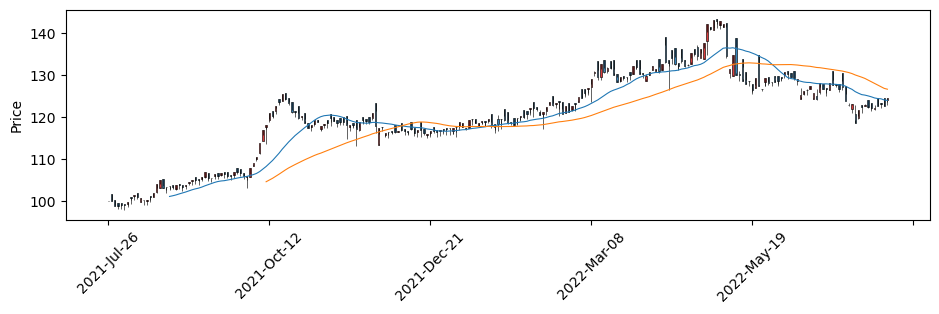

** ARIRANG 신흥국MSCI인버스(합성 H) **
Ticker  : 373530
Market  : Global
Type    : Index
MEAN +/-: 6 %
MAX/MIN : 124 / 96
RANGE.  : 28
PV      : 120


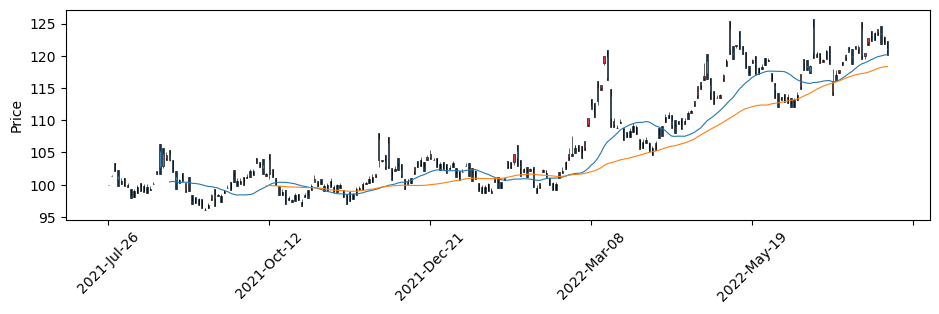

** TIGER 일본니케이225 **
Ticker  : 241180
Market  : JP
Type    : Index
MEAN +/-: -3 %
MAX/MIN : 112 / 85
RANGE.  : 27
PV      : 90


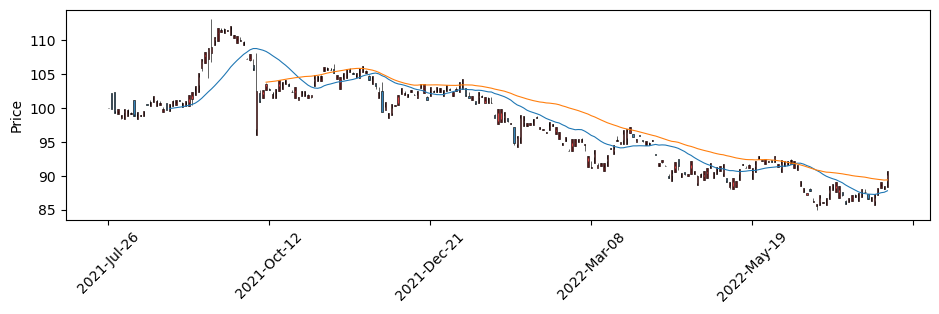

** KODEX 200 **
Ticker  : 069500
Market  : KR
Type    : Index
MEAN +/-: -12 %
MAX/MIN : 102 / 72
RANGE.  : 30
PV      : 75


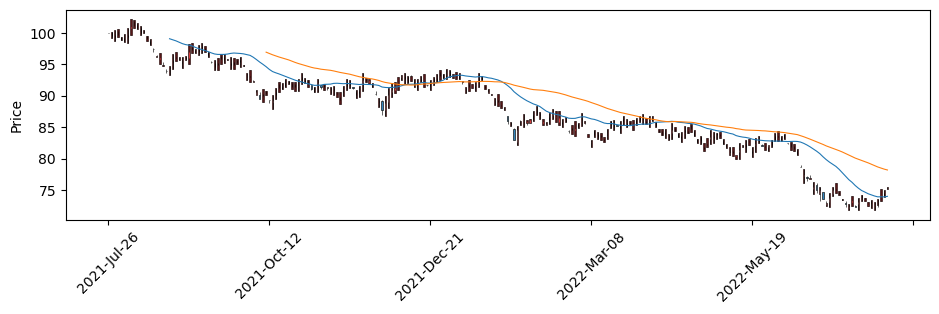

** TIGER 인버스 **
Ticker  : 123310
Market  : KR
Type    : Index
MEAN +/-: 13 %
MAX/MIN : 136 / 97
RANGE.  : 39
PV      : 130


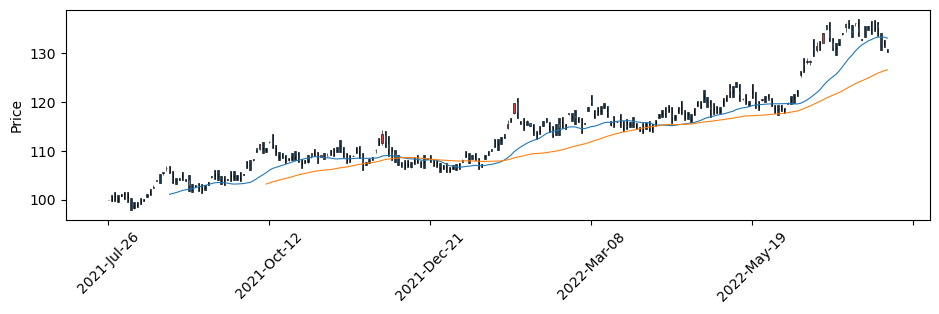

** TIGER 미국나스닥100 **
Ticker  : 133690
Market  : US
Type    : Index
MEAN +/-: 0 %
MAX/MIN : 113 / 82
RANGE.  : 31
PV      : 92


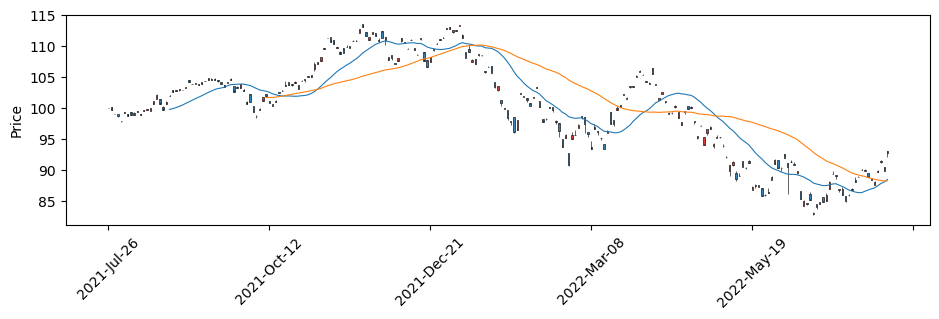

** TIGER 미국S&P500 **
Ticker  : 360750
Market  : US
Type    : Index
MEAN +/-: 4 %
MAX/MIN : 113 / 94
RANGE.  : 19
PV      : 102


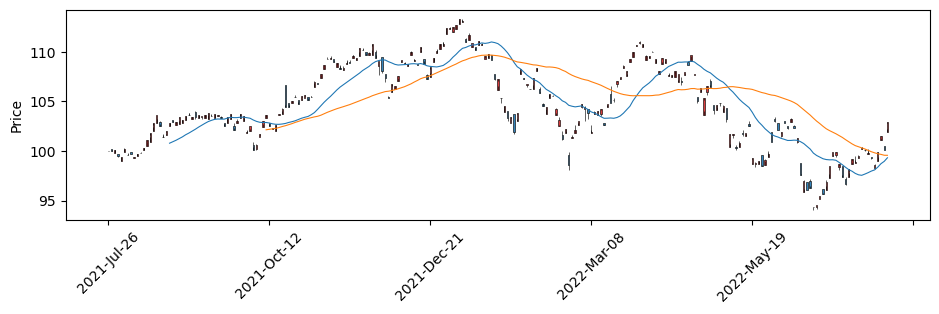

** 신한 S&P500 VIX S/T 선물 ETN C **
Ticker  : 500058
Market  : US
Type    : Index
MEAN +/-: -22 %
MAX/MIN : 101 / 58
RANGE.  : 43
PV      : 74


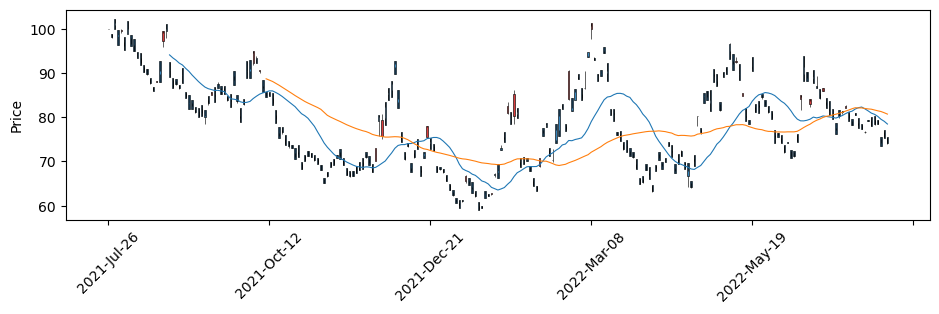

** TRUE S&P500 양매도 4% OTM ETN(H) **
Ticker  : 570049
Market  : US
Type    : Index
MEAN +/-: 3 %
MAX/MIN : 110 / 100
RANGE.  : 10
PV      : 106


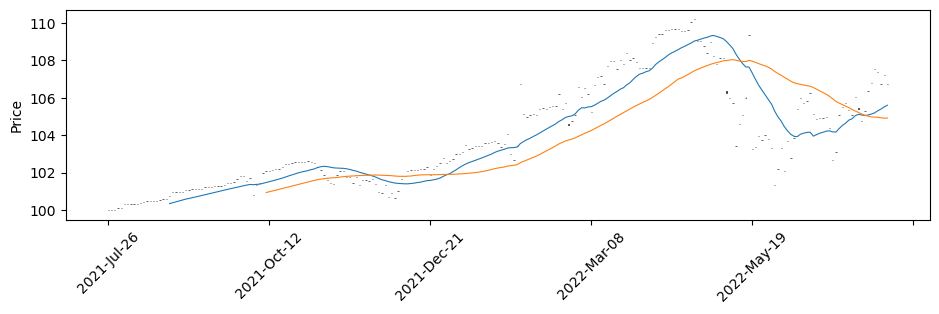

** KODEX 미국나스닥100선물인버스(H) **
Ticker  : 409810
Market  : US
Type    : Index
MEAN +/-: 16 %
MAX/MIN : 137 / 98
RANGE.  : 39
PV      : 125


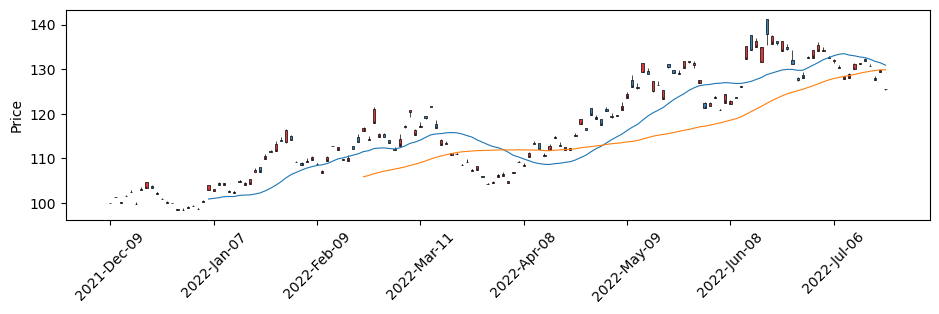

** TIGER 차이나전기차SOLACTIVE **
Ticker  : 371460
Market  : CN
Type    : Sector
MEAN +/-: -1 %
MAX/MIN : 123 / 65
RANGE.  : 58
PV      : 102


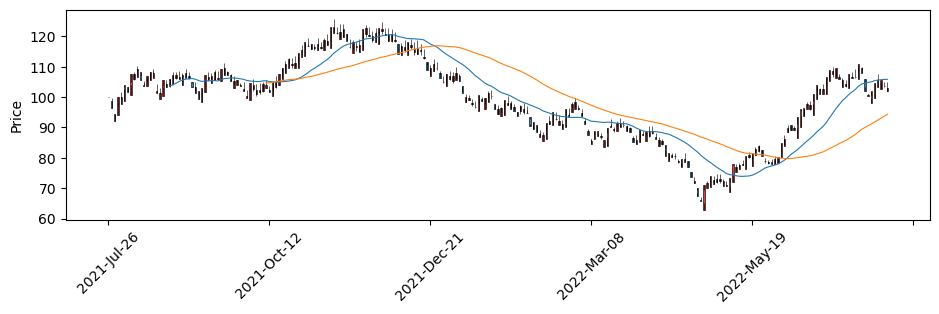

** TIGER 글로벌리튬&2차전지 SOLACTIVE(합성) **
Ticker  : 394670
Market  : CN
Type    : Sector
MEAN +/-: 2 %
MAX/MIN : 121 / 85
RANGE.  : 36
PV      : 100


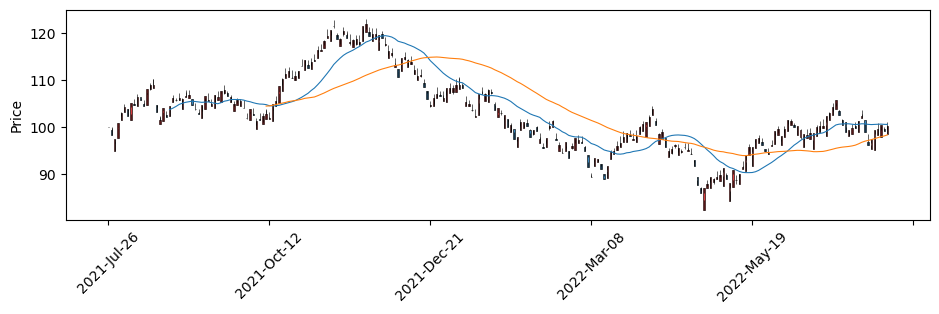

** KOSEF 릭소글로벌퓨처모빌리티MSCI **
Ticker  : 394350
Market  : Global
Type    : Sector
MEAN +/-: 4 %
MAX/MIN : 125 / 88
RANGE.  : 37
PV      : 94


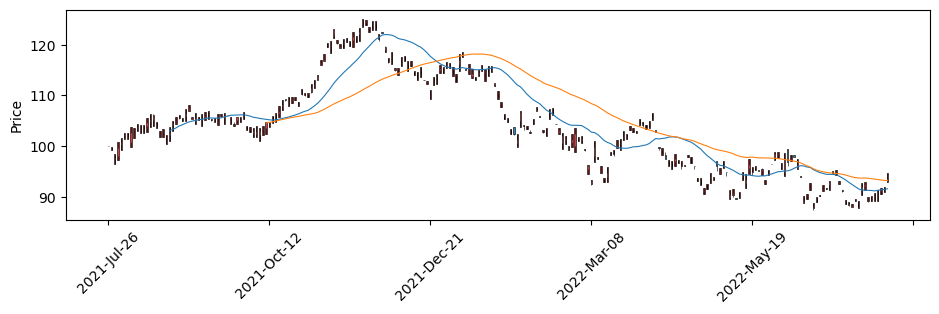

** TIGER 경기방어 **
Ticker  : 139280
Market  : KR
Type    : Sector
MEAN +/-: -14 %
MAX/MIN : 104 / 74
RANGE.  : 30
PV      : 79


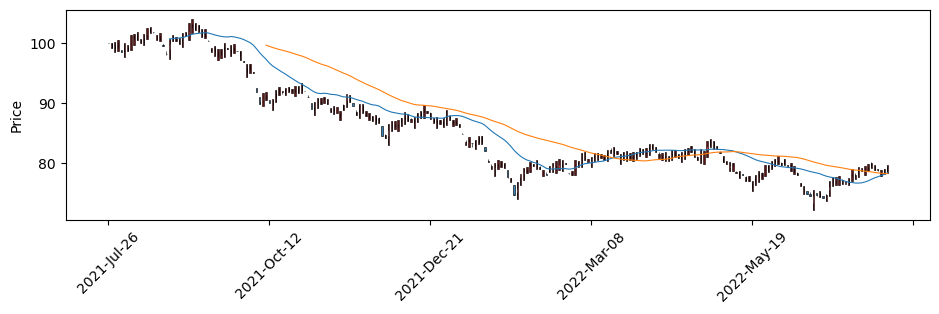

** TIGER 소프트웨어 **
Ticker  : 157490
Market  : KR
Type    : Sector
MEAN +/-: -24 %
MAX/MIN : 100 / 50
RANGE.  : 50
PV      : 53


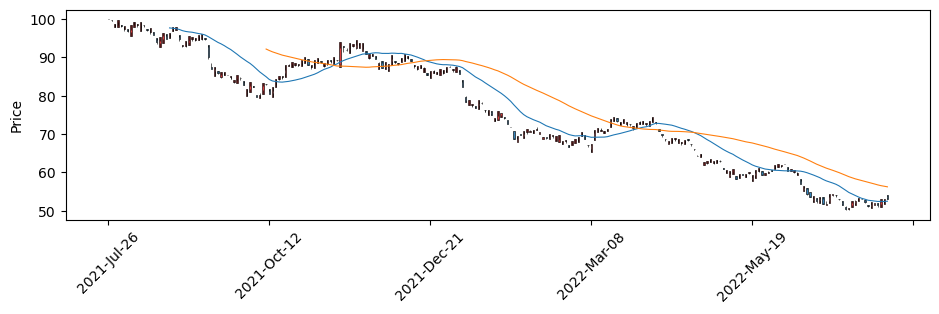

** KODEX 필수소비재 **
Ticker  : 266410
Market  : KR
Type    : Sector
MEAN +/-: -16 %
MAX/MIN : 100 / 70
RANGE.  : 30
PV      : 74


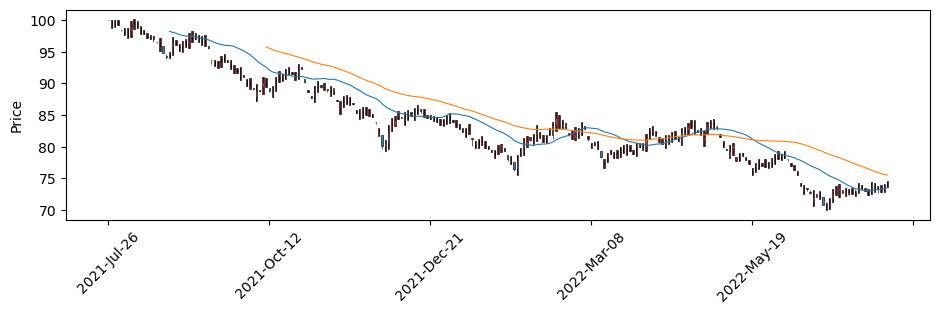

** TIGER 2차전지테마 **
Ticker  : 305540
Market  : KR
Type    : Sector
MEAN +/-: 3 %
MAX/MIN : 122 / 83
RANGE.  : 39
PV      : 88


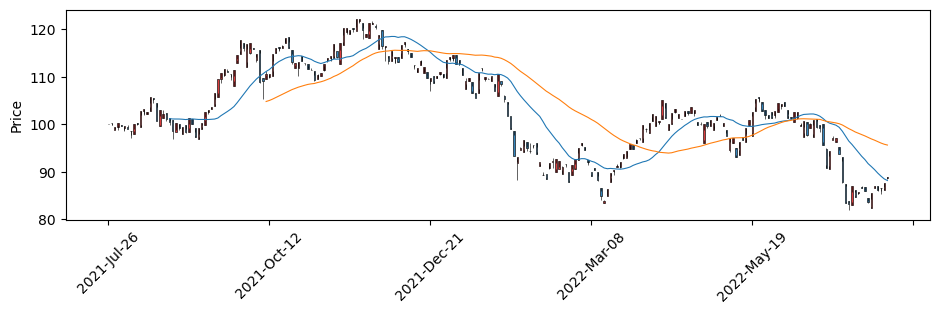

** TIGER 리츠부동산인프라 **
Ticker  : 329200
Market  : KR
Type    : Sector
MEAN +/-: 4 %
MAX/MIN : 114 / 94
RANGE.  : 20
PV      : 94


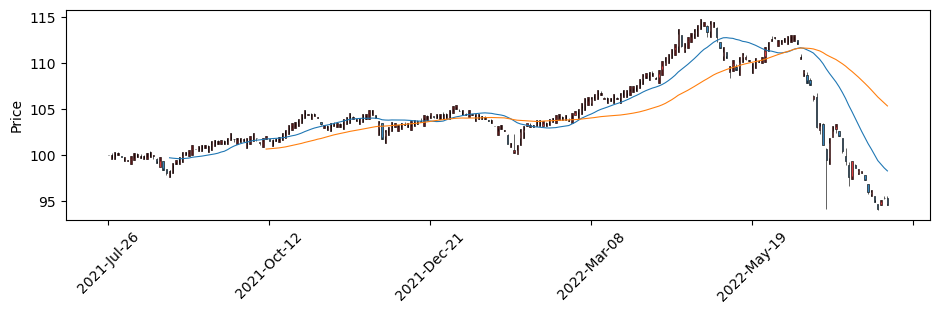

** KBSTAR Fn수소경제테마 **
Ticker  : 367770
Market  : KR
Type    : Sector
MEAN +/-: -13 %
MAX/MIN : 103 / 70
RANGE.  : 33
PV      : 74


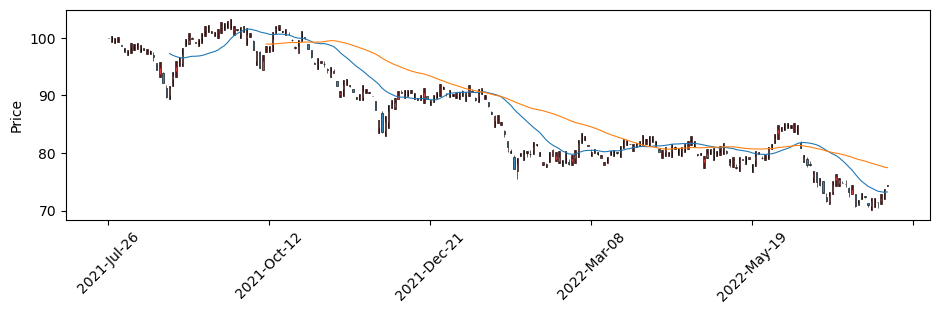

** KODEX 미국S&P에너지(합성) **
Ticker  : 218420
Market  : US
Type    : Sector
MEAN +/-: 39 %
MAX/MIN : 208 / 95
RANGE.  : 113
PV      : 167


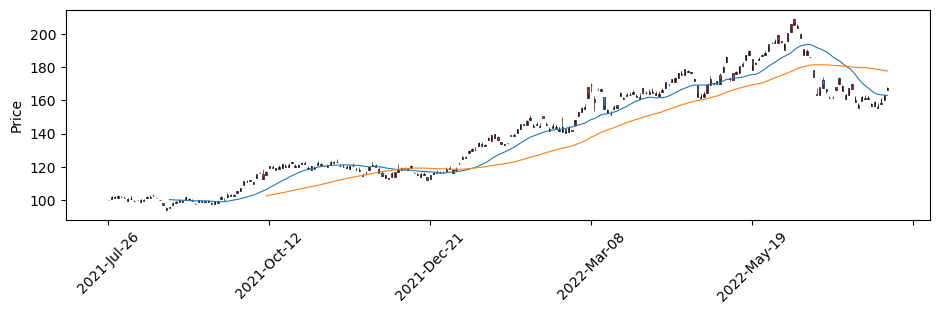

** TIGER S&P글로벌인프라(합성) **
Ticker  : 269370
Market  : US
Type    : Sector
MEAN +/-: 10 %
MAX/MIN : 123 / 100
RANGE.  : 23
PV      : 118


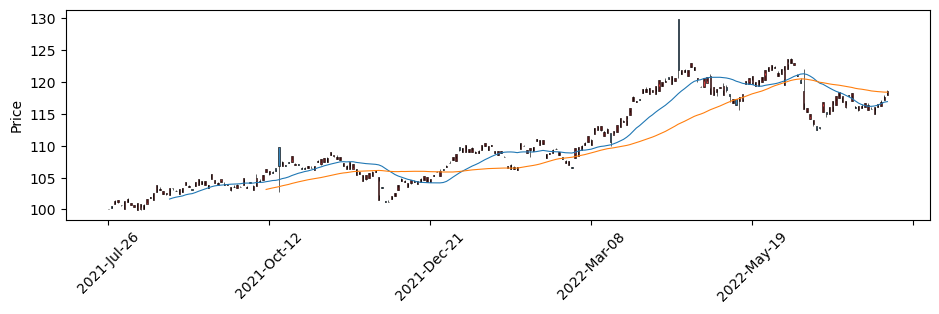

** KIDEX 미국WideMoat가치주 **
Ticker  : 309230
Market  : US
Type    : Sector
MEAN +/-: 2 %
MAX/MIN : 107 / 92
RANGE.  : 15
PV      : 102


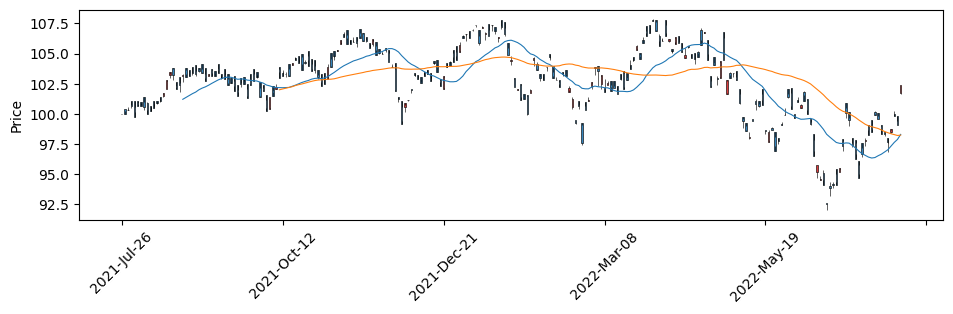

** TIGER 글로벌클라우드컴퓨팅INDXX **
Ticker  : 371450
Market  : US
Type    : Sector
MEAN +/-: -12 %
MAX/MIN : 114 / 62
RANGE.  : 52
PV      : 68


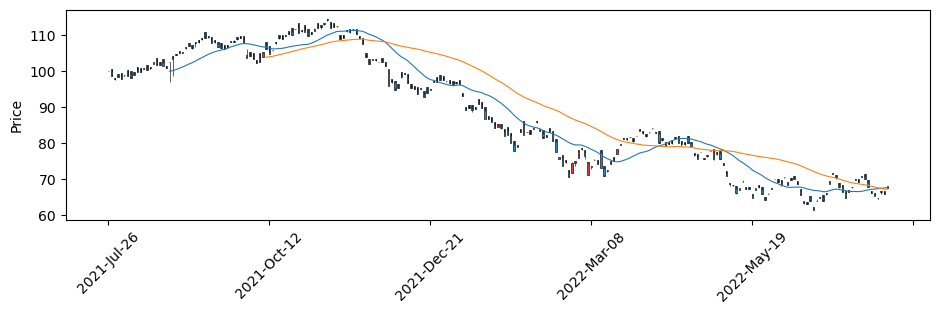

** KOSEF 미국방어배당성장나스닥 **
Ticker  : 373790
Market  : US
Type    : Sector
MEAN +/-: 10 %
MAX/MIN : 123 / 99
RANGE.  : 24
PV      : 118


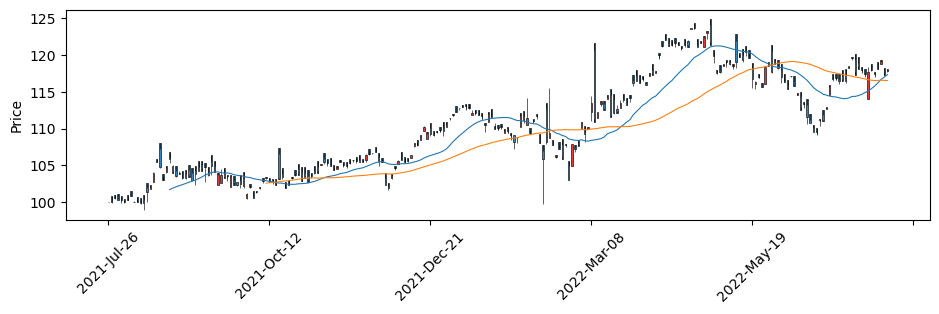

** 삼성 미국 대형 가치주 ETN **
Ticker  : 530020
Market  : US
Type    : Sector
MEAN +/-: 14 %
MAX/MIN : 128 / 99
RANGE.  : 29
PV      : 118


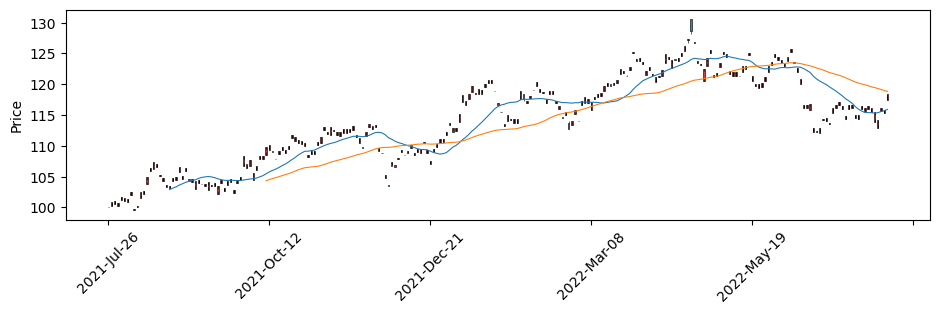

In [9]:
daydelta = 360   # 조회될 기간 설정. 일 기준
today = datetime.today()

start = (today + timedelta(days= -1 * daydelta)).strftime('%Y-%m-%d')
end = today.strftime('%Y-%m-%d')

print('---------------------------------------------')
print('최근', daydelta, '일 데이터 조회', '- MA 20d, 50d')
print('---------------------------------------------')
print()

l_perf = []
for i, row in ticker.sort_values(['TYPE', 'MARKET', 'POSITION']).iterrows():
    try:
        if row.MONITOR:
            data = web.naver.NaverDailyReader(row.TICKER, start= start, end= end).read().astype('int')
            data = data / data.iloc[0] * 100
            cmean = int(data.Close.mean()) - 100
            cmax = int(data.Close.max())
            cmin = int(data.Close.min())
            rng = cmax - cmin
            cpv = int(data.Close[-1])
            l_perf.append([row.TICKER, row.NAME, row.MARKET, row.TYPE, cmean, cmax, cmin, rng, cpv])
            
            print('**', row.NAME, '**')
            print('Ticker  :', row.TICKER)
            print('Market  :', row.MARKET)
            print('Type    :', row.TYPE)
            print('MEAN +/-:', cmean, '%')
            print('MAX/MIN :', cmax, '/', cmin)
            print('RANGE.  :', rng)
            print('PV      :', cpv)
            fig, axlist = mpf.plot(data, type='candle', style= s, figsize= (12, 3), returnfig= True, mav=(20, 50))

        # Annotation
#         for pi, prow in position.loc[position.TICKER == row.TICKER].iterrows():
#             if data.index[0] < pd.to_datetime(prow.DATE):
#                 x = data.reset_index().index[data.index == prow.DATE].item()
# #                 y = data.loc[data.index == prow.DATE, 'Close'].item()
#                 y = prow.PRICE
#                 cap = str(prow.CAP * -1)
#                 stocks = str(prow.STOCKS)
#                 sb = 'SELL' if prow.SELL else 'BUY'
#                 axlist[0].annotate(sb + ', ' + stocks, (x, y), xytext=(x, y*0.95), arrowprops= dict(arrowstyle='->'))
            plt.show()
    except:
        print('************* ERROR on', row.NAME)
        pass
    
performance = pd.DataFrame(data= l_perf, columns= ['TICKER', 'NAME', 'MARKET', 'TYPE', 'MEAN+/-', 'MAX', 'MIN', 'RNG', 'PV'])
performance.set_index(['TICKER'], inplace= True)

In [4]:
performance.sort_values(by= ['PV'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
510006,대신 인버스 니켈선물 ETN(H),Global,Commodity,-30,107,26,81,42
157490,TIGER 소프트웨어,KR,Sector,-24,100,50,50,53
371450,TIGER 글로벌클라우드컴퓨팅INDXX,US,Sector,-12,114,62,52,68
266410,KODEX 필수소비재,KR,Sector,-16,100,70,30,74
500058,신한 S&P500 VIX S/T 선물 ETN C,US,Index,-22,101,58,43,74
367770,KBSTAR Fn수소경제테마,KR,Sector,-13,103,70,33,74
069500,KODEX 200,KR,Index,-12,102,72,30,75
195980,ARIRANG 신흥국MSCI(합성 H),Global,Index,-10,102,73,29,75
139280,TIGER 경기방어,KR,Sector,-14,104,74,30,79


In [5]:
performance.sort_values(by= ['RNG'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
570049,TRUE S&P500 양매도 4% OTM ETN(H),US,Index,3,110,100,10,106
332610,ARIRANG 미국단기우량회사채,US,Bond,3,111,98,13,110
309230,KIDEX 미국WideMoat가치주,US,Sector,2,107,92,15,102
319640,TIGER 골드선물(H),Global,Commodity,1,110,93,17,93
360750,TIGER 미국S&P500,US,Index,4,113,94,19,102
329200,TIGER 리츠부동산인프라,KR,Sector,4,114,94,20,94
200250,KOSEF 인도Nifty50(합성),Global,Index,10,120,99,21,108
269370,TIGER S&P글로벌인프라(합성),US,Sector,10,123,100,23,118
373790,KOSEF 미국방어배당성장나스닥,US,Sector,10,123,99,24,118


In [6]:
performance.sort_values(by= ['MIN'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
510006,대신 인버스 니켈선물 ETN(H),Global,Commodity,-30,107,26,81,42
157490,TIGER 소프트웨어,KR,Sector,-24,100,50,50,53
510004,대신 인버스 아연선물 ETN(H),Global,Commodity,-18,100,56,44,89
500058,신한 S&P500 VIX S/T 선물 ETN C,US,Index,-22,101,58,43,74
371450,TIGER 글로벌클라우드컴퓨팅INDXX,US,Sector,-12,114,62,52,68
500014,신한 인버스 옥수수 선물 ETN(H),Global,Commodity,-15,107,64,43,82
510018,대신 인버스 알루미늄 선물 ETN(H),Global,Commodity,-13,108,64,44,104
371460,TIGER 차이나전기차SOLACTIVE,CN,Sector,-1,123,65,58,102
367770,KBSTAR Fn수소경제테마,KR,Sector,-13,103,70,33,74
